In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%pylab inline
import tensorflow as tf
import numpy as np
import healpy as hp

Populating the interactive namespace from numpy and matplotlib


/Users/charnock/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from S2CNN import S2CNN

In [4]:
ℓ_max = 47
n_side_in = 16
n_side_out = 8
kernel_size = 7
kernel_index = 0
input_filters = 2
output_filters = 3
ω = 0.
name = 'w'
sph_conv = S2CNN(ℓ_max, n_side_in, n_side_out, kernel_size, kernel_index, input_filters, output_filters, ω, name)

/Users/charnock/Physics/S2CNN/S2CNN.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  Yℓm_arr[:, 0, self.ℓ_max] = ss.sph_harm(0, 0, ϕE, ϕ)
/Users/charnock/Physics/S2CNN/S2CNN.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  Yℓm_arr[:, ℓ, m + self.ℓ_max] = ss.sph_harm(m, ℓ, ϕE, ϕ)


In [5]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# Wigner-$d$ values

/Users/charnock/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


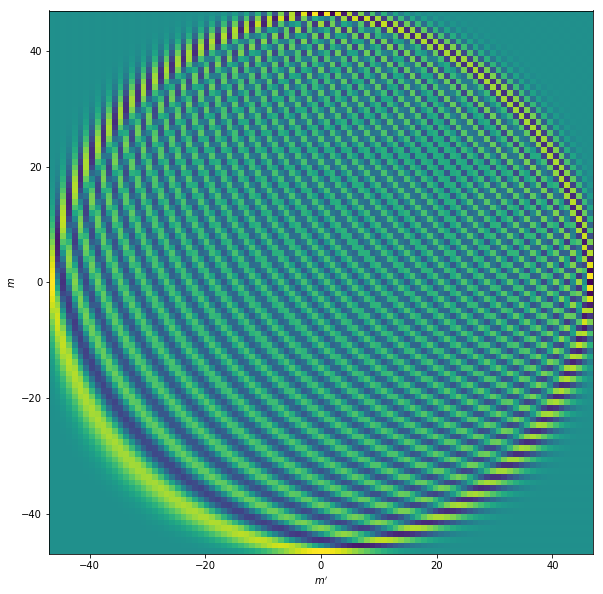

In [6]:
figure(figsize = (10, 10))
imshow(sess.run(sph_conv.d).astype(np.float64)[ℓ_max], extent = [-ℓ_max, ℓ_max, -ℓ_max, ℓ_max])
xlabel("$m'$")
ylabel("$m$");

# Test map

/Users/charnock/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/healpy/sphtfunc.py:295: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning)


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/charnock/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/healpy/projector.py:198: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix
/Users/charnock/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/healpy/sphtfunc.py:156: ComplexWarning: Casting complex values to real discards the imaginary part
  lmax = lmax, mmax = mmax, gal_cut = gal_cut)


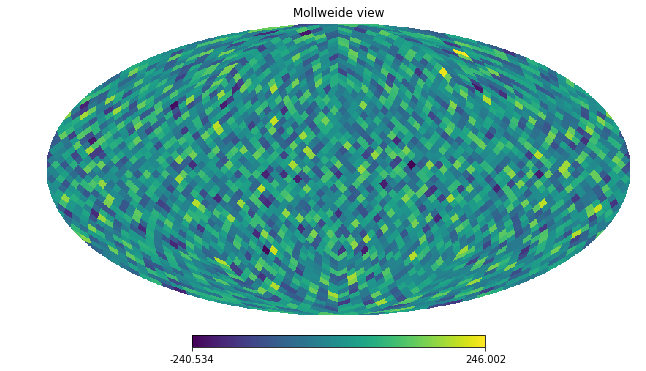

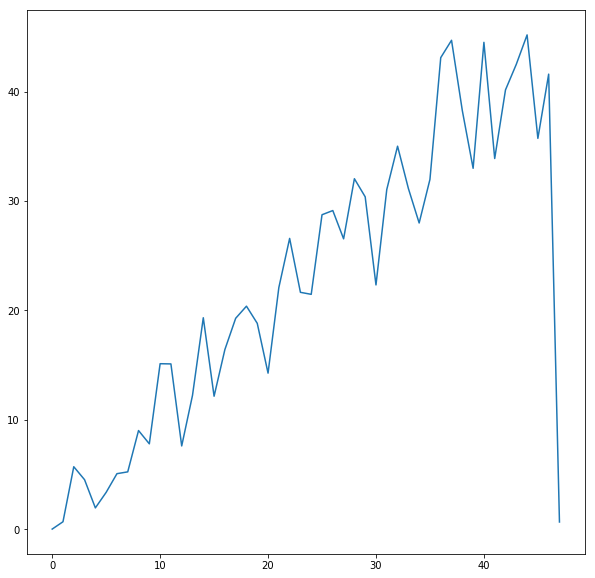

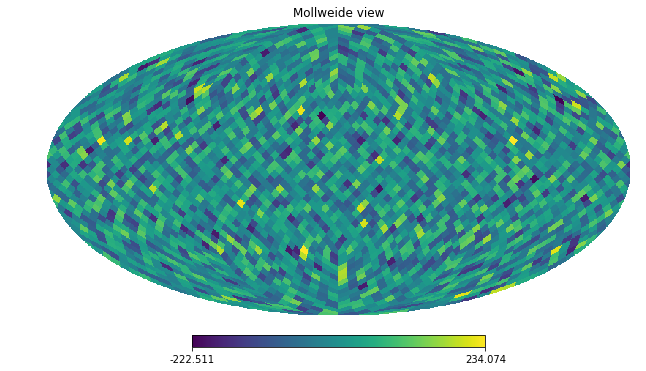

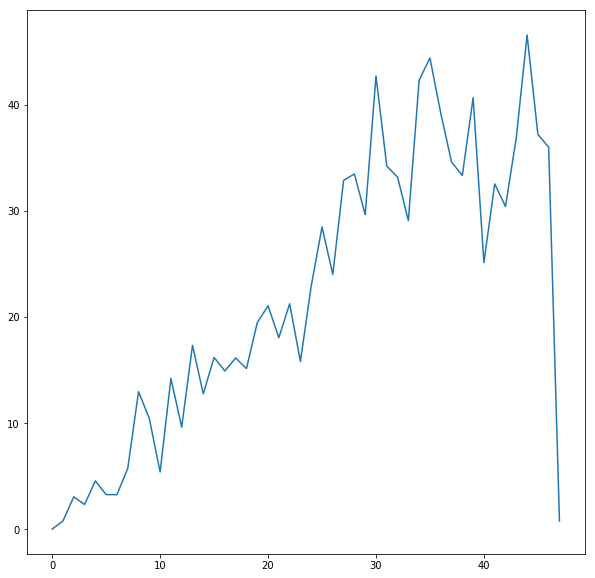

In [7]:
s_map = np.swapaxes(np.array([hp.synfast(np.arange(ℓ_max), n_side_in), hp.synfast(np.arange(ℓ_max), n_side_in)]), 0, 1)
test_map = sess.run(sph_conv.s, feed_dict = {sph_conv.s: [s_map]})[0]
for input_filter in range(input_filters):
    hp.mollview(test_map[:, input_filter])
    figure(figsize = (10, 10))
    plot(hp.anafast(test_map[:, input_filter]))

(-16.301317+0j) (12.884108+0j)


/Users/charnock/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-11.512011+0j) (18.529285+0j)


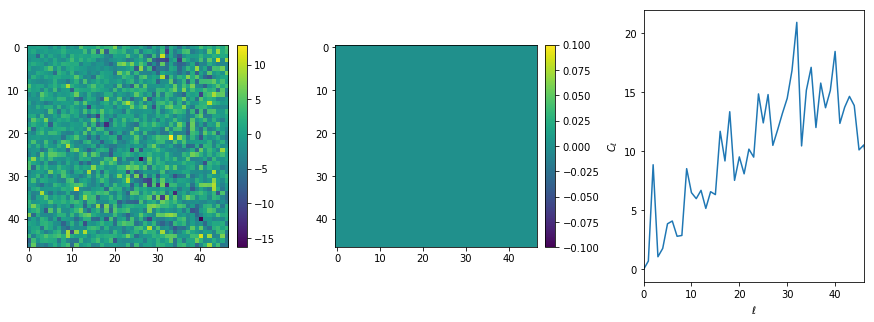

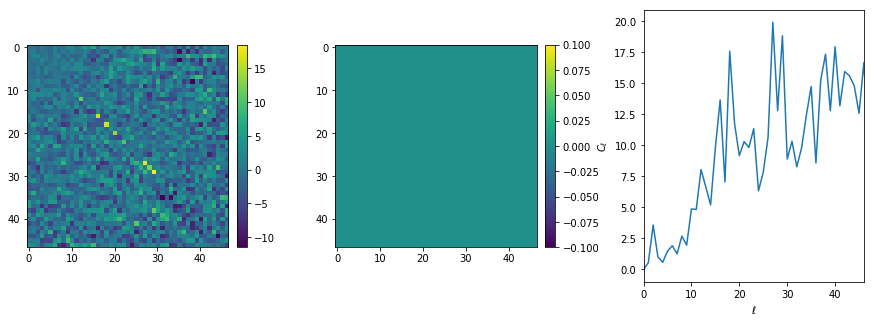

In [8]:
transformed_map = sess.run(sph_conv.spherical_transform(sph_conv.s, sph_conv.Yℓm), feed_dict = {sph_conv.s: [s_map]})[0]
for input_filter in range(input_filters):
    print(np.min(transformed_map[:, :, input_filter]), np.max(transformed_map[:, :, input_filter]))
    aℓm, Cℓ = sph_conv.get_aℓm_Cℓ(transformed_map[:, :, input_filter])
    fig, ax = subplots(1, 3, figsize = (15, 5))
    subplots_adjust(wspace = 0.4)
    aℓm_real_plot = ax[0].imshow(aℓm[:, :, 0])
    colorbar(aℓm_real_plot, ax = ax[0], fraction=0.046, pad=0.04)
    aℓm_imag_plot = ax[1].imshow(aℓm[:, :, 1])
    colorbar(aℓm_imag_plot, ax = ax[1], fraction=0.046, pad=0.04)
    ax[2].plot(Cℓ)
    ax[2].set_xlabel("$\ell$")
    ax[2].set_ylabel("$C_\ell$")
    ax[2].set_xlim([0, ℓ_max - 1])
    ax[2].set_aspect('auto')

# Test weight kernel

/Users/charnock/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/healpy/projector.py:198: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


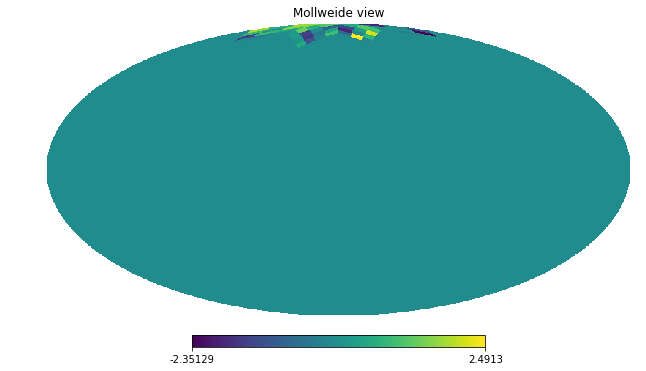

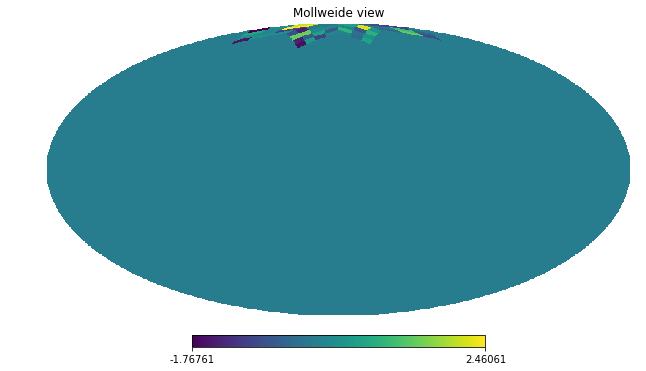

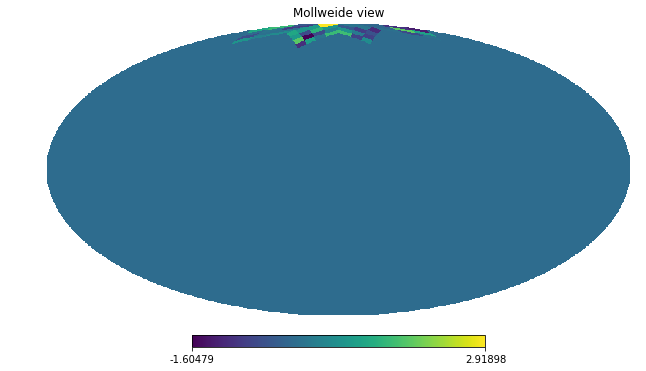

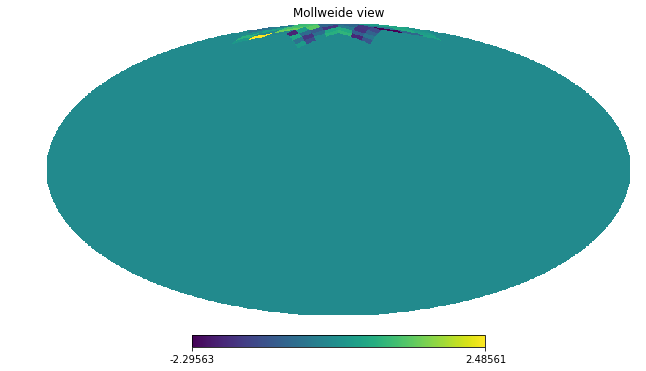

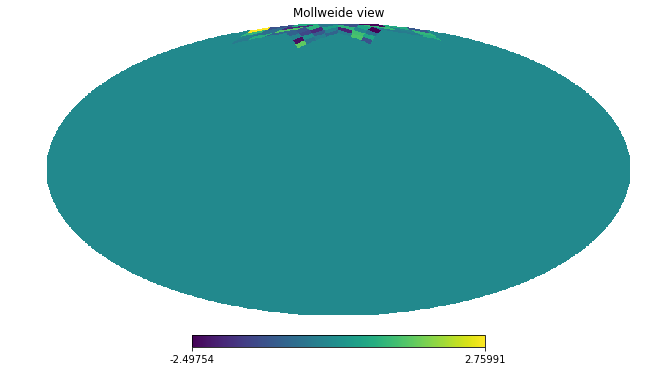

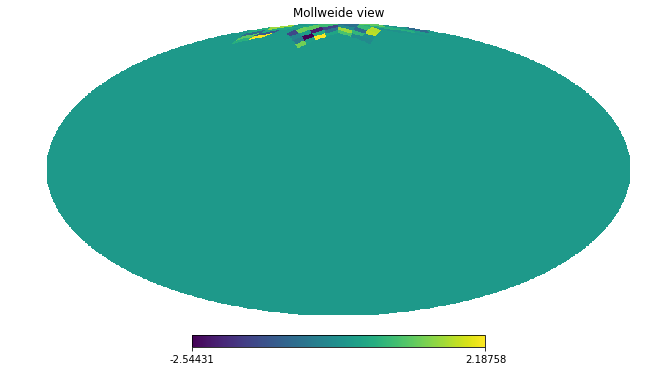

In [9]:
test_k = sess.run(sph_conv.k, feed_dict = {sph_conv.indices: sph_conv.weight_indices})
for input_filter in range(input_filters):
    for output_filter in range(output_filters):
        hp.mollview(test_k[:, input_filter, output_filter])

(48, 95, 2, 3)
(-0.018964699+0j) (0.018964699+0j)


/Users/charnock/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.022808995+0j) (0.02295265+0j)
(-0.01671578+0j) (0.018147886+0j)
(-0.029068999+0j) (0.029068999+0j)
(-0.028894143+0j) (0.030436222+0j)
(-0.031965967+0j) (0.030513728+0j)


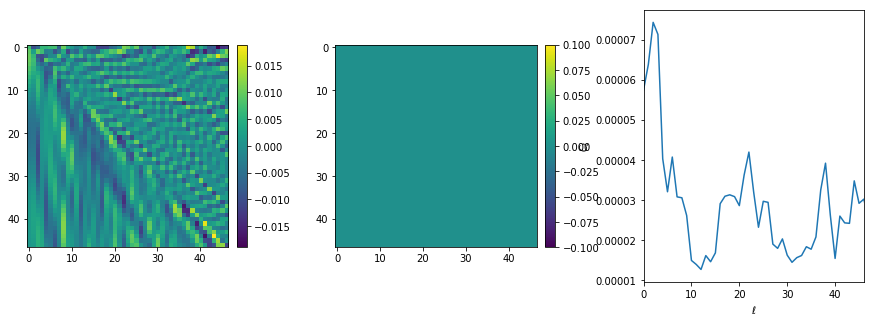

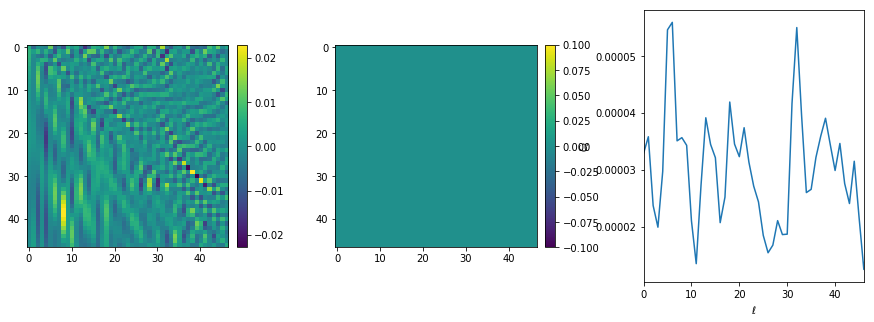

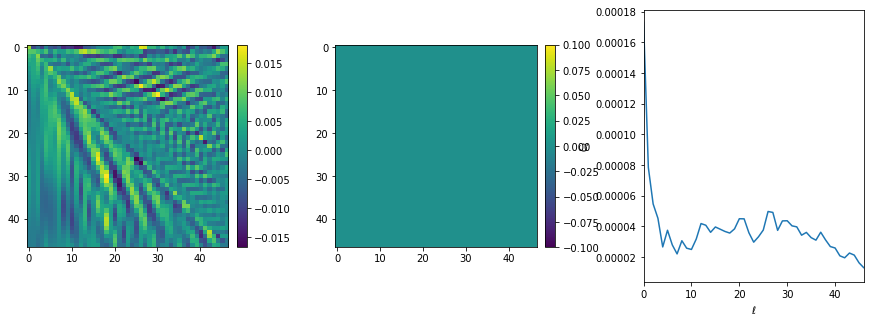

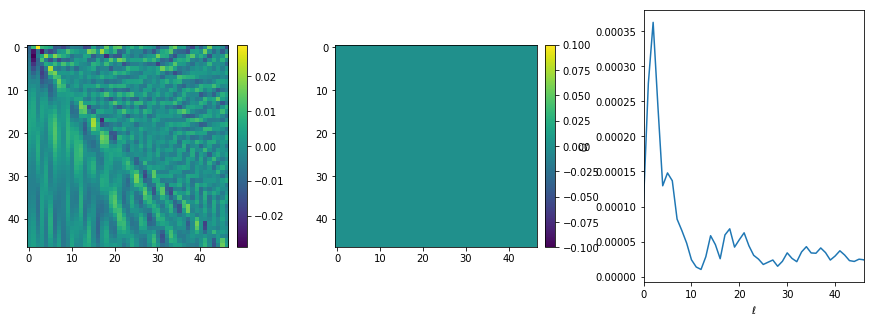

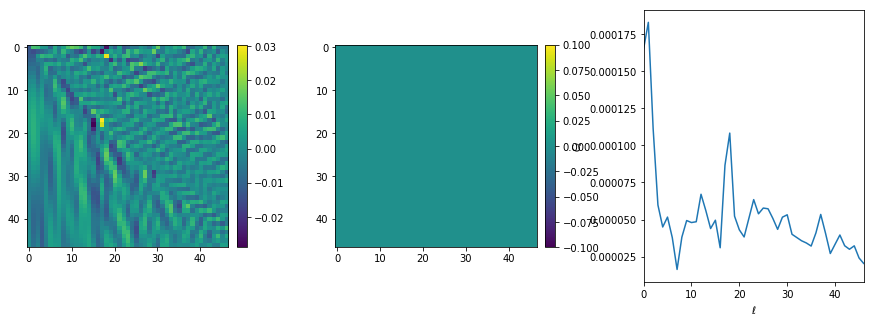

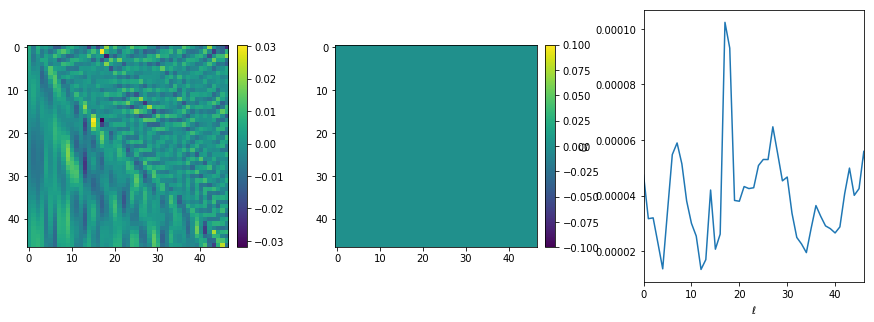

In [10]:
transformed_kernel = sess.run(sph_conv.spherical_transform(sph_conv.k, sph_conv.Yℓm, kernel = True), feed_dict = {sph_conv.indices: sph_conv.weight_indices})
for input_filter in range(input_filters):
    for output_filter in range(output_filters):
        print(np.min(transformed_kernel[:, :, input_filter, output_filter]), np.max(transformed_kernel[:, :, input_filter, output_filter]))
        aℓm, Cℓ = sph_conv.get_aℓm_Cℓ(transformed_kernel[:, :, input_filter, output_filter])
        fig, ax = subplots(1, 3, figsize = (15, 5))
        subplots_adjust(wspace = 0.4)
        aℓm_real_plot = ax[0].imshow(aℓm[:, :, 0])
        colorbar(aℓm_real_plot, ax = ax[0], fraction=0.046, pad=0.04)
        aℓm_imag_plot = ax[1].imshow(aℓm[:, :, 1])
        colorbar(aℓm_imag_plot, ax = ax[1], fraction=0.046, pad=0.04)
        ax[2].plot(Cℓ)
        ax[2].set_xlabel("$\ell$")
        ax[2].set_ylabel("$C_\ell$")
        ax[2].set_xlim([0, ℓ_max - 1])
        ax[2].set_aspect('auto')

-2.8391938 3.5482922
-4.84209 4.038966
-4.342076 3.9642093


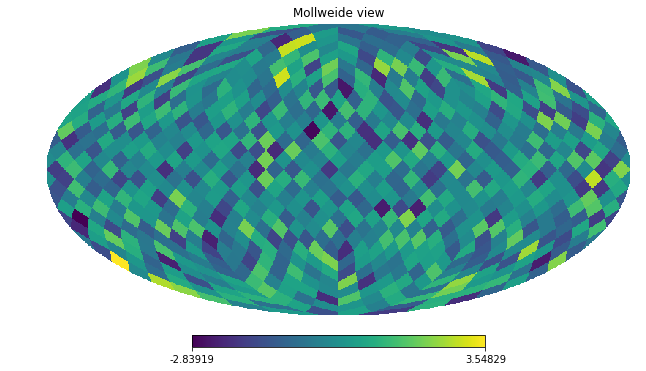

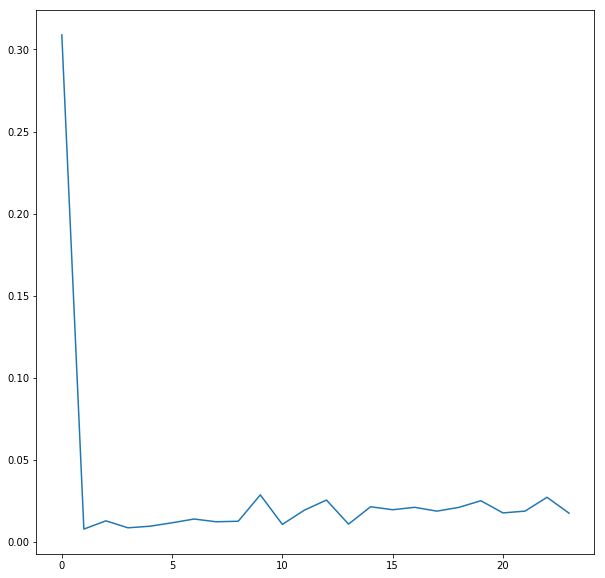

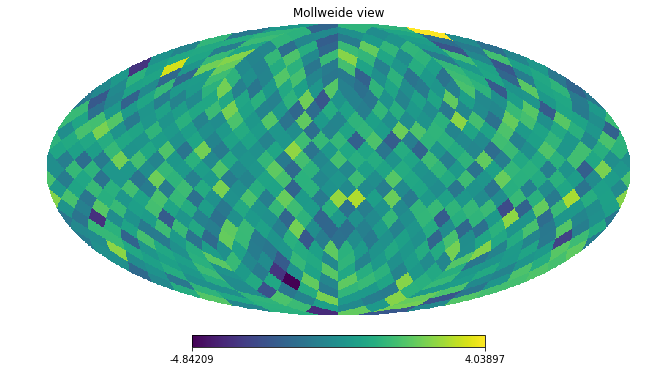

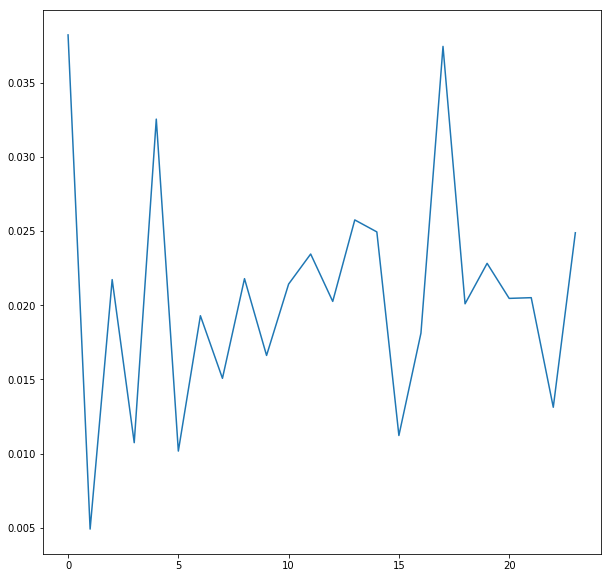

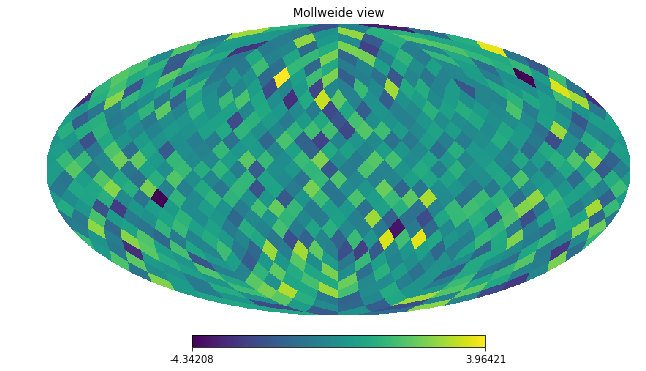

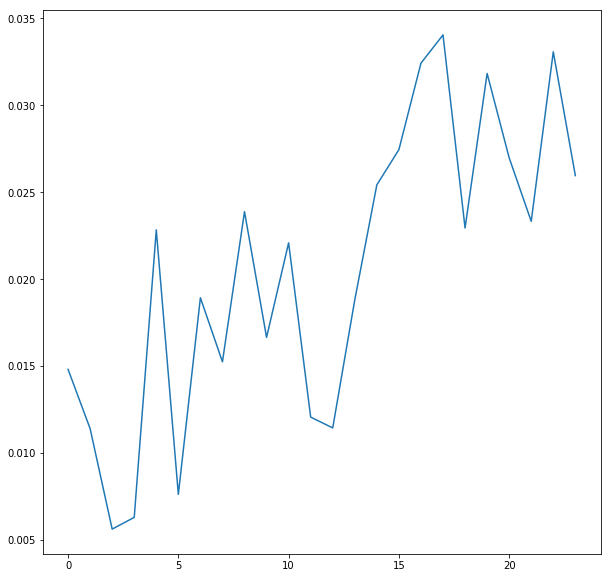

In [11]:
convolved_map = sess.run(sph_conv.T, feed_dict = {sph_conv.s: [s_map], sph_conv.indices: sph_conv.weight_indices, })[0]
for output_filter in range(output_filters):
    print(np.min(convolved_map[:, output_filter]), np.max(convolved_map[:, output_filter]))
    hp.mollview(convolved_map[:, output_filter])
    figure(figsize(10, 10))
    plot(hp.anafast(convolved_map[:, output_filter]))